In [14]:
import pandas as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import zero_one_loss

sns.set_theme()
Dataset = pd.read_csv('wdbc_normalizacao.csv')
#Dataset.round(2)
Dataset

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Para Validação Dividimos os Dados:** 
- **treino**,75% 
- **teste**, 25%

In [15]:
from sklearn.model_selection import train_test_split

# Dividindo em treino e teste 85% treino e 15% teste:
D_treino, D_teste = train_test_split(Dataset, test_size=.15, random_state=30) #test_size, por padrão é 25%

print("D_treino: ", D_treino.shape, dict(D_treino.iloc[:, 0].value_counts()))
print("D_teste: ", D_teste.shape, dict(D_teste.iloc[:, 0].value_counts()))

D_treino:  (483, 31) {0: 305, 1: 178}
D_teste:  (86, 31) {0: 52, 1: 34}


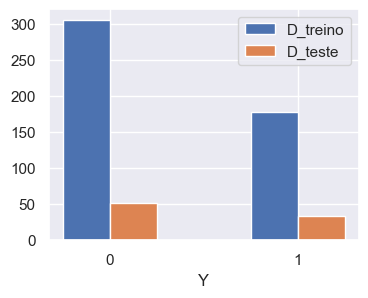

In [16]:
# visualizar as amostras:
plt.figure(figsize=(4,3))
plt.hist([D_treino.iloc[:, 0], D_teste.iloc[:, 0]], bins=[0,1,2], align='left', rwidth=0.5)
plt.legend(['D_treino','D_teste'])
plt.xlabel('Y'), plt.xticks([0,1])
plt.show()

In [17]:
# Selecionado os atributos e classes de treino e teste.
X_treino = D_treino.iloc[:, 1:31]
Y_treino = D_treino.iloc[:, 0]
print("D_treino: ", (X_treino.shape, Y_treino.shape))

X_teste = D_teste.iloc[:, 1:31]
Y_teste = D_teste.iloc[:, 0]
print("D_teste: ", (X_teste.shape, Y_teste.shape))


D_treino:  ((483, 30), (483,))
D_teste:  ((86, 30), (86,))


**Normalização:**

In [18]:
def Normalization(x):
        
    return x/x.abs().max()

In [19]:
X_treino_Normalizado = Normalization(X_treino)
X_teste_Normalizado = Normalization(X_teste)

In [21]:
#Criando, primeiramente, rede com 1000 epocas
from sklearn import neural_network
modelo = neural_network.MLPClassifier(random_state=30, max_iter=1000)

In [22]:
def teste(g, D_tst, metrica, **kwds):
    X_tst, y_tst = D_tst
    y_true = y_tst
    y_pred = g.predict(X_tst)
    E_tst = metrica(y_true, y_pred, **kwds)
    
    return E_tst


def validacao(Modelo, D_trn, D_val, metrica, **kwds):
    # Treinamento:
    g = Modelo.fit(*D_trn)
    
    # Teste:
    E_trn = teste(g, D_trn, metrica, **kwds)
    E_val = teste(g, D_val, metrica, **kwds)
    
    return E_trn, E_val

In [23]:
# Dividindo em  dados de treino e validação 15%
X_train, X_val, y_train, y_val = train_test_split(X_treino_Normalizado, Y_treino, test_size=0.15, random_state=30)

In [11]:
#Avaliando o modelo: 
E_trn, E_tst = validacao(modelo, (X_train, y_train), (X_teste_Normalizado, Y_teste), zero_one_loss)
print("Erro de treinamento:", E_trn)
print("Erro de teste :", E_tst)


Erro de treinamento: 0.039024390243902474
Erro de teste : 0.046511627906976716


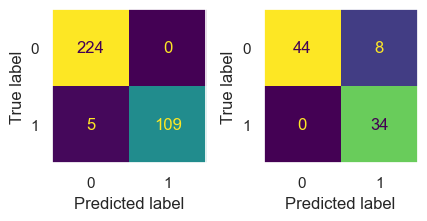

In [13]:
# Plot matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Avaliação modelo  (matriz de confusão)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_trn, cm_tst = validacao(modelo, (X_train, y_train), (X_teste_Normalizado, Y_teste), confusion_matrix)

with sns.plotting_context(rc={'grid.linewidth': 0}):
    fig, ax = plt.subplots(ncols=2, figsize=(5,2))
    ConfusionMatrixDisplay(confusion_matrix=cm_trn, display_labels=[0,1]).plot(ax=ax[0], colorbar=False)
    ConfusionMatrixDisplay(confusion_matrix=cm_tst, display_labels=[0,1]).plot(ax=ax[1], colorbar=False)

C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimiza

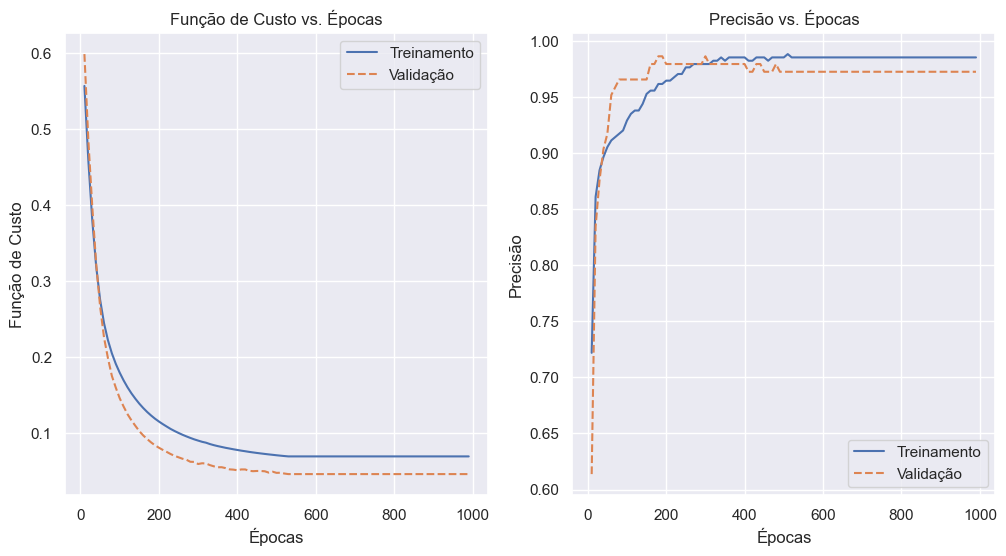

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

# Definir uma lista de diferentes números de épocas
epocas = list(range(10, 1000, 10))

# Métricas
custo_treino = []
custo_validacao = []
precisao_treino = []
precisao_validacao = []

for epoca in epocas:
    # Treinando o modelo
    modelo = MLPClassifier(random_state=30, max_iter=epoca)
    modelo.fit(X_train, y_train)
    
    # Precisão e custo para treinamento
    y_train_pred = modelo.predict_proba(X_train)
    custo_treino.append(log_loss(y_train, y_train_pred))
    precisao_treino.append(modelo.score(X_train, y_train))
    
    # Precis
    ão e custo para validação
    y_val_pred = modelo.predict_proba(X_val)
    custo_validacao.append(log_loss(y_val, y_val_pred))
    precisao_validacao.append(modelo.score(X_val, y_val))

plt.figure(figsize=(12, 6))

# Plotar função de custo
plt.subplot(1, 2, 1)
plt.plot(epocas, custo_treino, label='Treinamento')
plt.plot(epocas, custo_validacao, label='Validação', linestyle='--')
plt.xlabel('Épocas')
plt.ylabel('Função de Custo')
plt.title('Função de Custo vs. Épocas')
plt.legend()

# Plotar precisão
plt.subplot(1, 2, 2)
plt.plot(epocas, precisao_treino, label='Treinamento')
plt.plot(epocas, precisao_validacao, label='Validação', linestyle='--' )
plt.xlabel('Épocas')
plt.ylabel('Precisão')
plt.title('Precisão vs. Épocas')
plt.legend()

plt.show()


In [12]:
# Avaliação modelo  (relatório de classificação)

from sklearn.metrics import classification_report

cr_trn, cr_tst = validacao(modelo, (X_train, y_train), (X_teste_Normalizado, Y_teste),
                            classification_report, target_names=['Outcome 0', 'Outcome 1'])
print("treino:\n", cr_trn)
print("teste :\n", cr_tst)

treino:
               precision    recall  f1-score   support

   Outcome 0       0.94      1.00      0.97       267
   Outcome 1       1.00      0.89      0.94       143

    accuracy                           0.96       410
   macro avg       0.97      0.94      0.96       410
weighted avg       0.96      0.96      0.96       410

teste :
               precision    recall  f1-score   support

   Outcome 0       1.00      0.92      0.96        52
   Outcome 1       0.89      1.00      0.94        34

    accuracy                           0.95        86
   macro avg       0.95      0.96      0.95        86
weighted avg       0.96      0.95      0.95        86



In [ ]:
# plot history:
fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(15,5))

epochs = range(1, len(history['loss']) + 1)

ax1.plot(epochs, history['loss'], 'm', label='Treinamento')
ax1.plot(epochs, history['val_loss'], 'r--', label='Validação')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Perda')
ax1.legend()

ax2.plot(epochs, history['accuracy'], 'c', label='Treinamento')
ax2.plot(epochs, history['val_accuracy'], 'b--', label='Validação')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Acurácia')
ax2.legend()

plt.show()

In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Criando o modelo...
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=30))  # Camada oculta com 10 neurônios
model.add(Dense(1, activation='sigmoid'))  # Camada de saída com 1 neurônio (sigmoid) temos:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# com validação:
history = model.fit(
    X_train, y_train, epochs=1000, batch_size=1,
    validation_data=(X_val, y_val)
).history

Epoch 1/1000
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9542 - loss: 0.1448 - val_accuracy: 0.9724 - val_loss: 0.0808
Epoch 2/1000
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9473 - loss: 0.1395 - val_accuracy: 0.9793 - val_loss: 0.0800
Epoch 3/1000
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9575 - loss: 0.1296 - val_accuracy: 0.9862 - val_loss: 0.0794
Epoch 4/1000
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9568 - loss: 0.1331 - val_accuracy: 0.9862 - val_loss: 0.0794
Epoch 5/1000
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9578 - loss: 0.1172 - val_accuracy: 0.9793 - val_loss: 0.0781
Epoch 6/1000
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9280 - loss: 0.1684 - val_accuracy: 0.9862 - val_loss: 0.0775
Epoch 7/1000
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9347 - loss: 0.1459 - val_accuracy: 0.9793 - val_loss: 0.0769
Epoch 8/1000
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9603 - loss: 0.1369 - 

In [26]:
#Para 400 epocas
from sklearn.neural_network import MLPClassifier
modelo_ideal = MLPClassifier(random_state=30, max_iter=400)
modelo_ideal.fit(X_train, y_train)

MLPClassifier(max_iter=400, random_state=30)

In [27]:
# Avaliação modelo  (relatório de classificação)

from sklearn.metrics import classification_report

cr_trn, cr_tst = validacao(modelo_ideal, (X_train, y_train), (X_teste_Normalizado, Y_teste),
                            classification_report, target_names=['Outcome 0', 'Outcome 1'])
print("treino:\n", cr_trn)
print("teste :\n", cr_tst)

treino:
               precision    recall  f1-score   support

   Outcome 0       0.94      1.00      0.97       267
   Outcome 1       1.00      0.89      0.94       143

    accuracy                           0.96       410
   macro avg       0.97      0.94      0.96       410
weighted avg       0.96      0.96      0.96       410

teste :
               precision    recall  f1-score   support

   Outcome 0       1.00      0.92      0.96        52
   Outcome 1       0.89      1.00      0.94        34

    accuracy                           0.95        86
   macro avg       0.95      0.96      0.95        86
weighted avg       0.96      0.95      0.95        86

